In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import spearmanr, kendalltau
from Historic_Crypto import HistoricalData
import seaborn as sns
import warnings

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process import kernels 

warnings.filterwarnings("ignore")

In [2]:
ticker = 'BTC-USD'
granularity = 21600
start_date = '2021-06-01-00-00'
end_date = '2024-01-31-00-00'
data = HistoricalData(ticker, granularity, start_date, end_date).retrieve_data()

Formatting dates...
Requesting data chunk: 2021-06-01T00:00:00 to 2021-08-15T00:00:00
Retrieved 301 rows.
Requesting data chunk: 2021-08-15T00:00:00 to 2021-10-29T00:00:00
Retrieved 301 rows.
Requesting data chunk: 2021-10-29T00:00:00 to 2022-01-12T00:00:00
Retrieved 301 rows.
Requesting data chunk: 2022-01-12T00:00:00 to 2022-03-28T00:00:00
Retrieved 301 rows.
Requesting data chunk: 2022-03-28T00:00:00 to 2022-06-11T00:00:00
Retrieved 301 rows.
Requesting data chunk: 2022-06-11T00:00:00 to 2022-08-25T00:00:00
Retrieved 301 rows.
Requesting data chunk: 2022-08-25T00:00:00 to 2022-11-08T00:00:00
Retrieved 301 rows.
Requesting data chunk: 2022-11-08T00:00:00 to 2023-01-22T00:00:00
Retrieved 301 rows.
Requesting data chunk: 2023-01-22T00:00:00 to 2023-04-07T00:00:00
Retrieved 301 rows.
Requesting data chunk: 2023-04-07T00:00:00 to 2023-06-21T00:00:00
Retrieved 301 rows.
Requesting data chunk: 2023-06-21T00:00:00 to 2023-09-04T00:00:00
Retrieved 301 rows.
Requesting data chunk: 2023-09-04T

In [3]:
data

,low,high,open,close,volume
time,,,,,
2021-06-01 00:00:00,36500.00,37918.97,37276.23,37278.51,4044.096212
2021-06-01 06:00:00,35929.49,37434.89,37278.19,36597.34,2552.710178
2021-06-01 12:00:00,35669.14,37400.00,36601.20,36158.19,5463.008998
2021-06-01 18:00:00,35783.24,36800.00,36158.19,36685.00,3653.287429
2021-06-02 00:00:00,35920.00,36918.44,36684.99,36806.77,2047.222183
...,...,...,...,...,...
2024-01-30 00:00:00,43136.76,43787.35,43303.30,43368.67,2939.167833
2024-01-30 06:00:00,43220.00,43558.98,43365.20,43526.96,1511.312335
2024-01-30 12:00:00,43115.47,43872.99,43526.95,43397.58,5110.107051


In [4]:
data.index

DatetimeIndex(['2021-06-01 00:00:00', '2021-06-01 06:00:00',
               '2021-06-01 12:00:00', '2021-06-01 18:00:00',
               '2021-06-02 00:00:00', '2021-06-02 06:00:00',
               '2021-06-02 12:00:00', '2021-06-02 18:00:00',
               '2021-06-03 00:00:00', '2021-06-03 06:00:00',
               ...
               '2024-01-28 18:00:00', '2024-01-29 00:00:00',
               '2024-01-29 06:00:00', '2024-01-29 12:00:00',
               '2024-01-29 18:00:00', '2024-01-30 00:00:00',
               '2024-01-30 06:00:00', '2024-01-30 12:00:00',
               '2024-01-30 18:00:00', '2024-01-31 00:00:00'],
              dtype='datetime64[ns]', name='time', length=3909, freq=None)

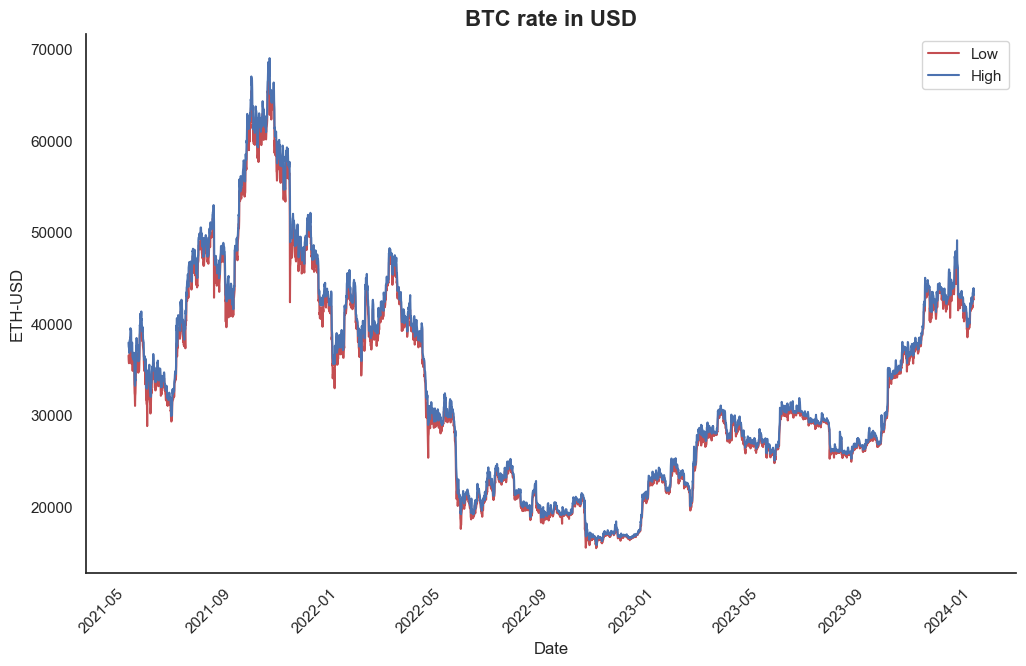

In [5]:
sns.set()
plt.figure(figsize = (12,7))
sns.set_style("white")
plt.plot(data['low'], color = 'r', label='Low')
plt.plot(data['high'], color = 'b', label='High')
sns.despine()
plt.xticks(rotation = 45)
plt.xlabel('Date')
plt.ylabel('ETH-USD')
plt.title('BTC rate in USD', fontsize = 16, fontweight = 'bold')
plt.legend()
plt.show()

# Volatility Analysis

In [6]:
np.std(data)

low       11444.068791
high      11772.267626
open      11614.594436
close     11615.699436
volume     3658.700141
dtype: float64

In [7]:
years = ['2020','2021','2022','2023']
std_vals = []
for year in years:
    std_vals.append(np.std(data[year+'-01-01':year+'-12-31']['close']))

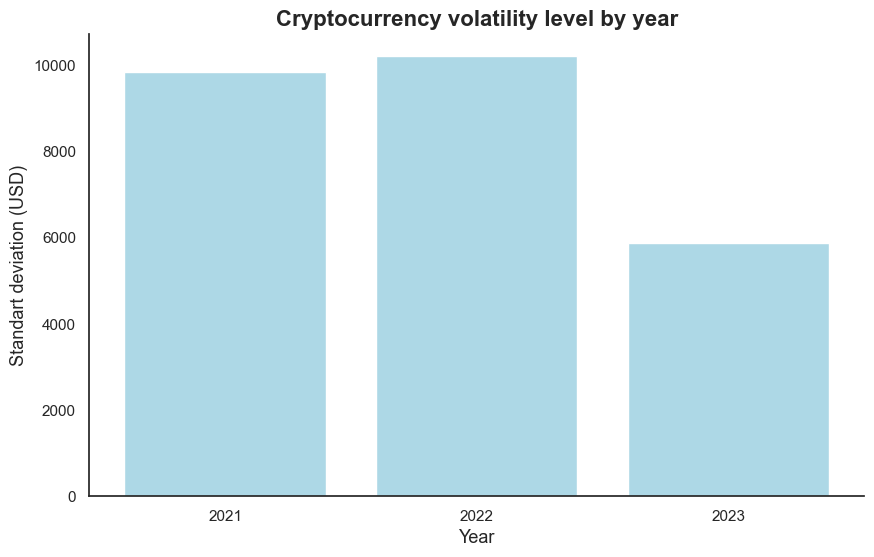

In [8]:
plt.figure(figsize = (10,6))
plt.bar(years, std_vals, color = 'lightblue')
plt.title("Сryptocurrency volatility level by year",fontsize = 16, fontweight = "bold")
plt.xlabel('Year', fontsize = 13)
plt.ylabel('Standart deviation (USD)', fontsize = 13)
sns.despine()
plt.show()

In [9]:
date_range = pd.date_range(start=data.index[0], end=data.index[-1], freq='MS')
std_vals_m = [np.std(data['close'][date : date + pd.offsets.MonthBegin(1)]) for date in date_range]
y_m = [date for date in date_range]

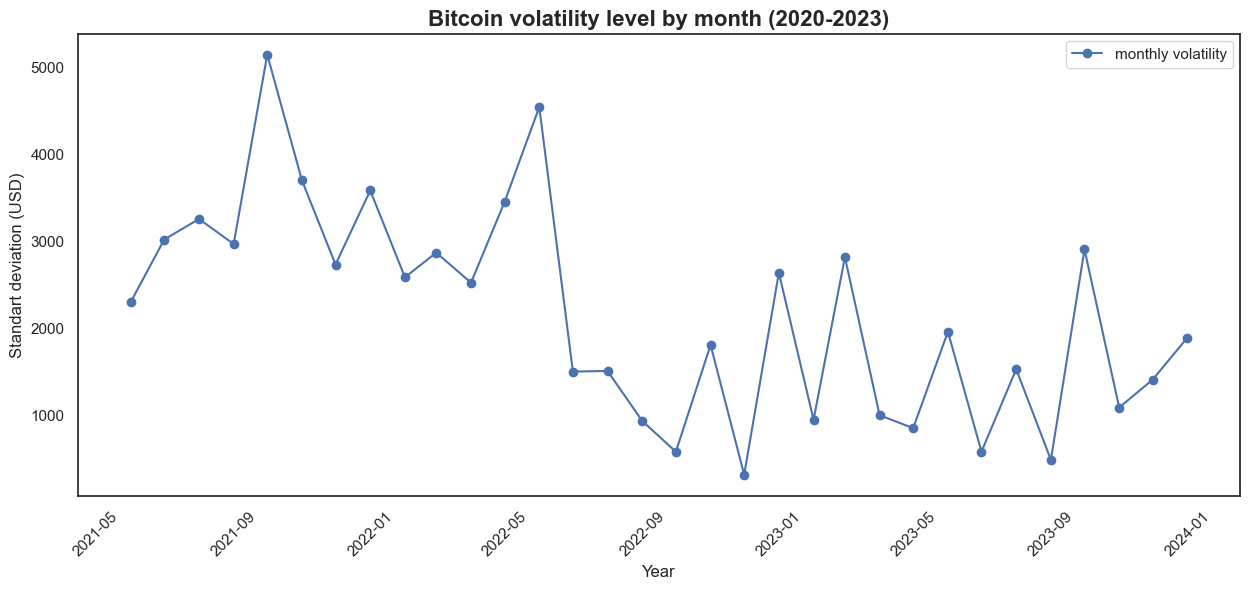

In [10]:
plt.figure(figsize=(15,6))
plt.plot(y_m,std_vals_m,marker='o',label='monthly volatility')
plt.xticks(rotation = 45)
plt.legend()
plt.title("Bitcoin volatility level by month (2020-2023)",fontsize = 16, fontweight = "bold")
plt.xlabel('Year')
plt.ylabel('Standart deviation (USD)')
plt.show()

According to volatility analysis, Bitcoin experienced periods of high volatility in 2021-2022. Several factors could contributed to the significant rise in cryptocurrency volatility during this period.
 1) Increased Institutional Interest. In 2021, there was a notable increase in institutional interest in cryptocurrencies. More institutional investors and corporations started to allocate funds to Bitcoin and other digital assets, influencing market dynamics.  
 
 2) Market Sentiment and Speculation. Cryptocurrency markets are highly sensitive to market sentiment and speculative trading. News, social media trends, and public perception can drive rapid and unpredictable price changes.  
 
 3) Regulatory Developments: Regulatory announcements and changes can have a significant impact on Bitcoin prices. Clarity or uncertainty regarding regulatory frameworks in different countries can influence investor confidence and market behavior.  
 
 4) NFT Boom. The rise of Non-Fungible Tokens (NFTs) in 2021 contributed to increased activity in the cryptocurrency space. NFT-related projects and the associated hype led to significant price movements

# Bitcoin volatility level - Rolling method

For smoothing transitions between points in a dataset we can use rolling method. By applying a moving window over the data, each point is replaced with a local statistic (such as mean or standard deviation) calculated within that window. This process helps to reduce noise and highlight trends, resulting in a smoother representation of the underlying pattern in the data.

In [11]:
def calculate_rolling_volatility(data, window):
    # Sorting DataFrame by DateTimeIndex
    data = data.sort_index()
    # Calculating rolling standard deviation (volatility) on the "close" column
    volatility = data['close'].rolling(window=window, min_periods=1).std()
    return volatility

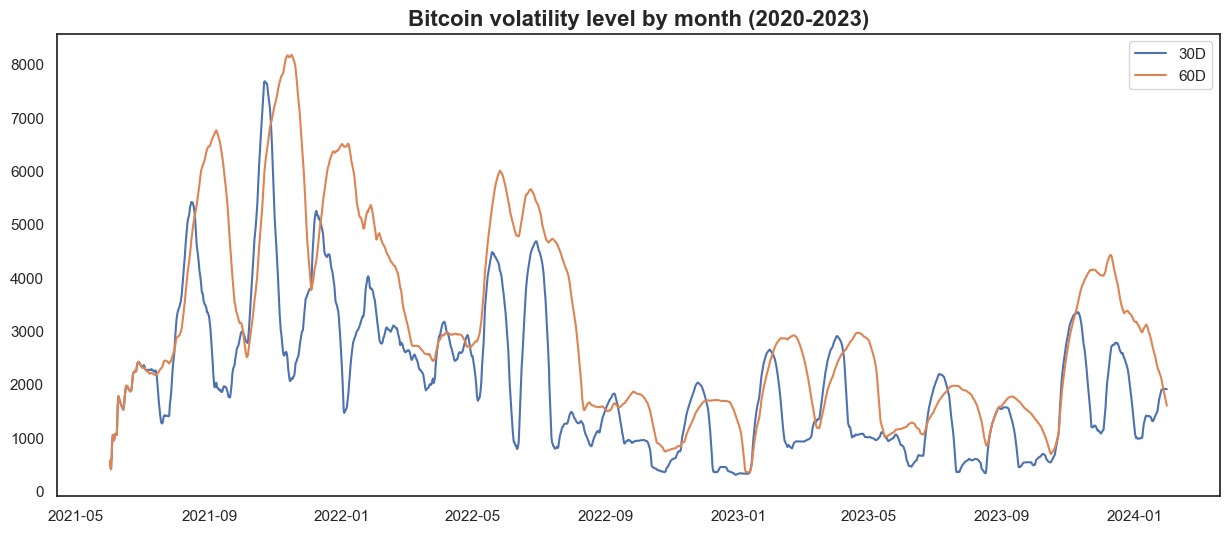

In [12]:
plt.figure(figsize=(15,6))
plt.plot(calculate_rolling_volatility(data,window='30D'),label='30D')
plt.plot(calculate_rolling_volatility(data,window='60D'),label='60D')
plt.legend()
plt.title("Bitcoin volatility level by month (2020-2023)",fontsize = 16, fontweight = "bold")
plt.show()

# Correlation analysis of trading volumes 

In the analysis below we will observe correlations beetween Bitcon and Etherium prices in USD using Pearson, Spearman and .

In [13]:
ticker_eth = 'ETH-USD'
data_eth = HistoricalData(ticker_eth, granularity, start_date, end_date).retrieve_data()

Formatting dates...
Requesting data chunk: 2021-06-01T00:00:00 to 2021-08-15T00:00:00
Retrieved 301 rows.
Requesting data chunk: 2021-08-15T00:00:00 to 2021-10-29T00:00:00
Retrieved 301 rows.
Requesting data chunk: 2021-10-29T00:00:00 to 2022-01-12T00:00:00
Retrieved 301 rows.
Requesting data chunk: 2022-01-12T00:00:00 to 2022-03-28T00:00:00
Retrieved 301 rows.
Requesting data chunk: 2022-03-28T00:00:00 to 2022-06-11T00:00:00
Retrieved 301 rows.
Requesting data chunk: 2022-06-11T00:00:00 to 2022-08-25T00:00:00
Retrieved 301 rows.
Requesting data chunk: 2022-08-25T00:00:00 to 2022-11-08T00:00:00
Retrieved 301 rows.
Requesting data chunk: 2022-11-08T00:00:00 to 2023-01-22T00:00:00
Retrieved 301 rows.
Requesting data chunk: 2023-01-22T00:00:00 to 2023-04-07T00:00:00
Retrieved 301 rows.
Requesting data chunk: 2023-04-07T00:00:00 to 2023-06-21T00:00:00
Retrieved 301 rows.
Requesting data chunk: 2023-06-21T00:00:00 to 2023-09-04T00:00:00
Retrieved 301 rows.
Requesting data chunk: 2023-09-04T

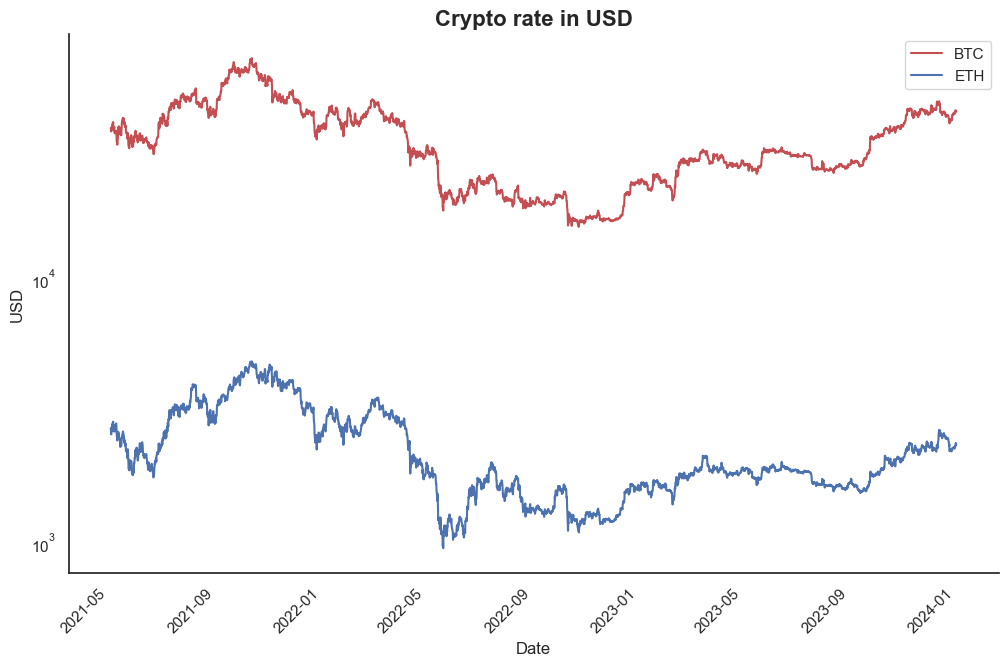

In [14]:
plt.figure(figsize = (12,7))
sns.set_style("white")
plt.plot(data['close'], color = 'r', label='BTC')
plt.plot(data_eth['close'],color = 'b', label='ETH')
sns.despine()
plt.xticks(rotation = 45)
plt.xlabel('Date')
plt.ylabel('USD')
plt.title('Crypto rate in USD', fontsize = 16, fontweight = 'bold')
plt.legend()
plt.yscale('log')
plt.show()

In [15]:
merged_data = pd.merge(data, data_eth, on='time', suffixes=('_btc', '_eth'))
btc_columns = ['volume_btc']
eth_columns = ['volume_eth']

# Pearson method

Measures the linear relationship between the volumes of sales for BTC and ETH. It assumes a linear association between the variables.

In [16]:
correlation_matrix = merged_data[btc_columns + eth_columns].corr(method = 'pearson')

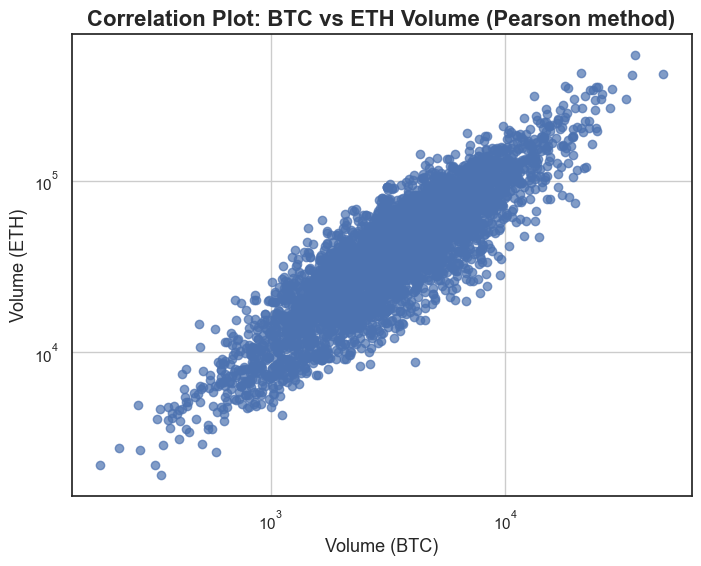

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['volume_btc'], merged_data['volume_eth'], alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.title('Correlation Plot: BTC vs ETH Volume (Pearson method)', fontsize = 16, fontweight = 'bold')
plt.xlabel('Volume (BTC)', fontsize = 13)
plt.ylabel('Volume (ETH)', fontsize = 13)
plt.grid(True)
plt.show()

## Spearman method

In [18]:
btc_data = merged_data[btc_columns]
eth_data = merged_data[eth_columns]
spearman_corr, p_value = spearmanr(btc_data, eth_data)
spearman_corr

0.8590671546355649

In [19]:
 p_value

0.0

<Axes: xlabel='volume_btc', ylabel='volume_eth'>

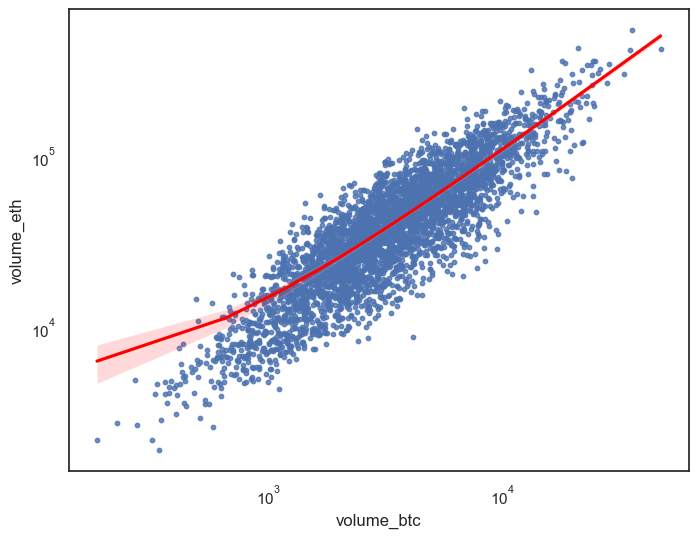

In [20]:
plt.figure(figsize=(8, 6))
plt.xscale('log')
plt.yscale('log')
sns.regplot(x=btc_data.squeeze(), y=eth_data.squeeze(), scatter_kws={'s': 10}, line_kws={'color': 'red'})

From the plot above, we can notice an interesting observation: the Spearman regression line shows uncertainty in the beginning, possibly due to the low and diffuse trading volumes for both cryptocurrencies.

There is a positive correlation between BTC and ETH volume, an increase in the BTC trade volume leads to an increase in the ETH trade volume. Apparent non-linearity towards low volumes is due to the log-scale, the red line corresponds to a linear fit to data. 

# Predicting Bitcoin prices using the Gaussian Processes regression method

Our Gaussian process model is trained using 70 random data points across the whole available time span. We then use this model to predict Bitcoin prices in between these 70 data points, as well to predict the trend for the foreseeable future. 

In [21]:
X = ((data.index.astype('int64') - data.index.astype('int64')[0]) // 10**9).values.reshape(-1, 1)
y = data['close'].values

# Normalization
X = (X - np.mean(X))/np.std(X)
y = (y - np.mean(y))/np.std(y)

rng = np.random.RandomState(1)
training_indices = rng.choice(np.arange(y.size), size=70, replace=False)
X_train, y_train = X[training_indices], y[training_indices]
#print(X_train, y_train)

There are several Gaussian process kernels, here we choose the one among standard kernels that seems to work best in practice. 

In [22]:
kernel = 1 * kernels.RationalQuadratic(length_scale=1, length_scale_bounds=(2e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X_train, y_train)
gaussian_process.kernel_

2.05**2 * RationalQuadratic(alpha=0.00827, length_scale=0.0454)

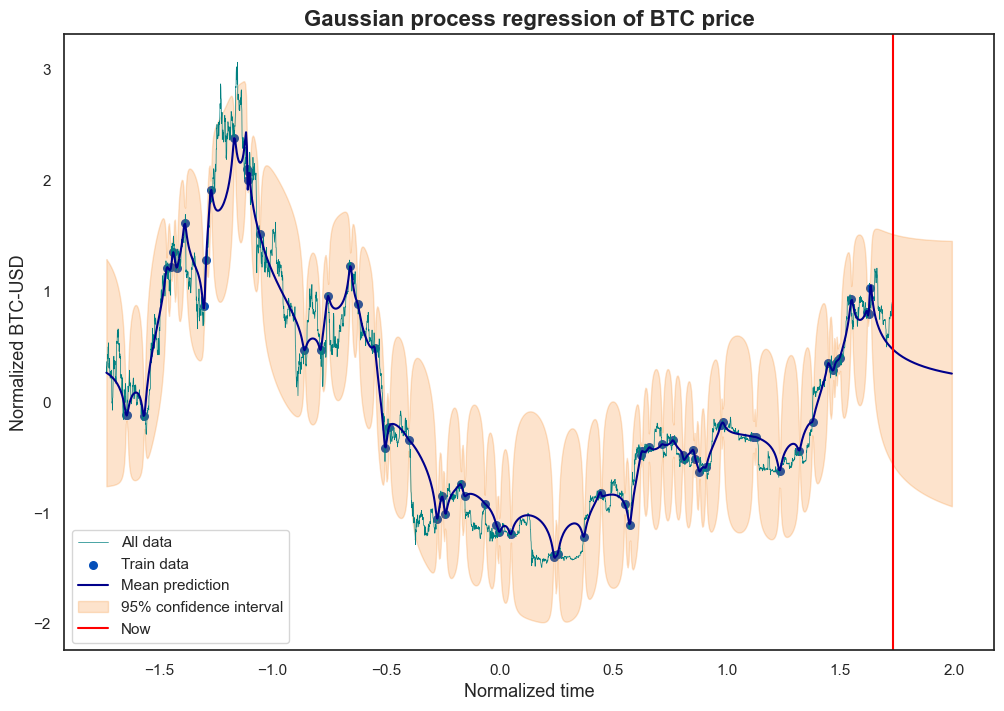

In [23]:
X_now = np.max(X)
X_new = np.linspace(np.min(X),X_now*1.15,1000).reshape(-1,1)
mean_prediction, std_prediction = gaussian_process.predict(X_new, return_std=True)

plt.figure(figsize = (12,8))
plt.plot(X, y, label=r"All data", linestyle="-",color='teal',lw=0.5)
plt.scatter(X_train, y_train, label="Train data",s=30,color='#054fb9')
plt.plot(X_new, mean_prediction, label="Mean prediction",color="darkblue")
plt.fill_between(
    X_new.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.2,
    label=r"95% confidence interval",
    color="#f57600"
)
plt.axvline(X_now,color='red',label='Now')
plt.legend()
plt.xlabel("Normalized time", fontsize = 13)
plt.ylabel("Normalized BTC-USD", fontsize = 13)
plt.title("Gaussian process regression of BTC price", fontsize = 16, fontweight = 'bold')
plt.show()

One of the most useful features of Gaussian process models is the uncertainty estimate they provide. Bitcoin price in USD is not a stochastic Gaussian process, there are more complex patterns and deterministic components. Nevertheless, many data points fall within the uncertainty intervals at a given time scale. 

Because Gaussian processes fluctuate around some mean value, in the cases of price surges, our Gaussian process model predicts the price to return closer to the average value. 

# Predicting Bitcoin prices using the XGBoost method

Here, we use the eXtreme Gradient Boost (XGBoost) method to predict Bitcoin prices. Our model with take 150 consecutive price measurements as an input, and predict the 151st one as an output. 

We train the model using the firt 70% of the time span of the data, and test the performance of the model using the remaining 30% of the time span.

In [24]:
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [25]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for ii in range(len(dataset)-time_step-1):
        aa = dataset[ii:(ii + time_step), 0]
        dataX.append(aa)
        dataY.append(dataset[ii + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [26]:
#creating scaler for data normalization
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(data['close'].values.reshape(-1,1))
closedf.shape

(3909, 1)

In [27]:
#separating data into Train and Test
training_size=int(len(closedf)*0.70)
test_size=len(closedf)-training_size
train_data=closedf[0:training_size,:]
test_data=closedf[training_size:len(closedf),:1]
print(f"train_data:{train_data.shape}")
print(f"test_data:{test_data.shape}")

train_data:(2736, 1)
test_data:(1173, 1)


In [28]:
time_step = 150
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)
print(f"X_train:{X_train.shape}")
print(f"y_train:{y_train.shape}")
print(f"X_test:{X_test.shape}")
print(f"y_test:{y_test.shape}")

X_train:(2585, 150)
y_train:(2585,)
X_test:(1022, 150)
y_test:(1022,)


In [29]:
train_data_time=data.index[time_step+1:training_size]
test_data_time=data.index[training_size+time_step+1:len(closedf)]
print(f"train_data_time:{train_data_time.shape}")
print(f"test_data_time:{test_data_time.shape}")

train_data_time:(2585,)
test_data_time:(1022,)


In [30]:
my_model = XGBRegressor(n_estimators=1000)
my_model.fit(X_train,y_train,verbose=True)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [31]:
#Model testing and evaluation
train_predict = my_model.predict(X_train)
test_predict = my_model.predict(X_test)
print(f"Mean Absolute Error - MAE: {str(mean_absolute_error(y_test,test_predict))}")
print(f"Root Mean squared Error - RMSE: {str(np.sqrt(mean_squared_error(y_test,test_predict)))}")

#Tranforming back into original form
train_predict = scaler.inverse_transform(train_predict.reshape(-1,1)) # Predicted data
test_predict = scaler.inverse_transform(test_predict.reshape(-1,1))
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) # Original, real data
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

Mean Absolute Error - MAE: 0.008771963751946697
Root Mean squared Error - RMSE: 0.0116240458969638


In [32]:
test_predict.shape

(1022, 1)

In [33]:
test_data_time.shape

(1022,)

In [34]:
np.squeeze(original_ytest).shape

(1022,)

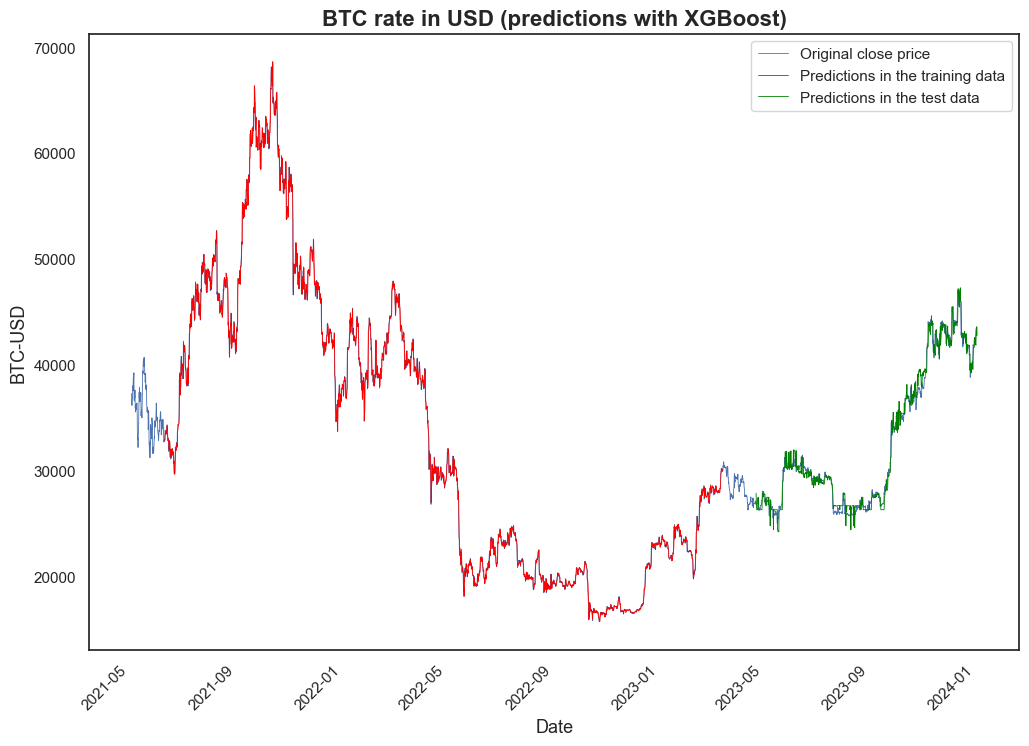

In [35]:
plt.figure(figsize = (12,8))
plt.plot(data['close'],lw=0.6,label='Original close price')
plt.plot(pd.DataFrame(index=train_data_time, data=np.squeeze(train_predict)),lw=0.6,label='Predictions in the training data', color = 'red')
plt.plot(pd.DataFrame(index=test_data_time, data=np.squeeze(test_predict)),lw=0.6,label='Predictions in the test data', color = 'green')
plt.xticks(rotation = 45)
plt.xlabel('Date',fontsize = 13)
plt.ylabel('BTC-USD',fontsize = 13)
plt.title('BTC rate in USD (predictions with XGBoost)', fontsize = 16, fontweight = 'bold')
plt.legend()
plt.show()

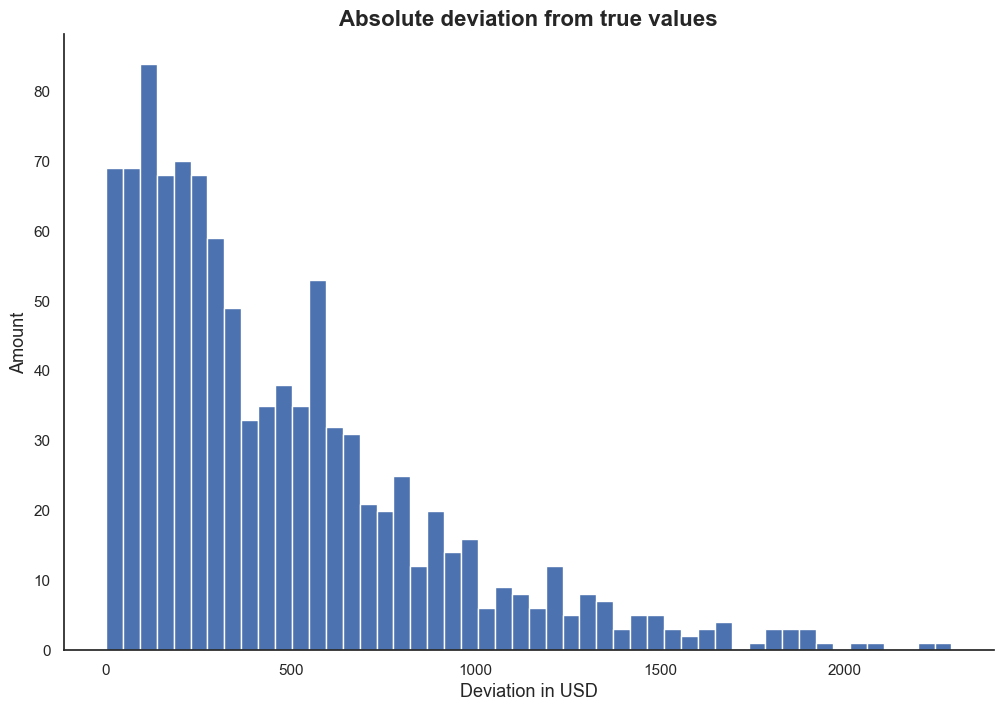

In [36]:
plt.figure(figsize = (12,8))
_=plt.hist(np.abs(test_predict-original_ytest),bins=50)
plt.title('Absolute deviation from true values', fontsize = 16, fontweight = 'bold')
plt.xlabel('Deviation in USD',fontsize = 13)
plt.ylabel('Amount',fontsize = 13)
sns.despine()
plt.show()